# M10: Empirische Wirtschaftsforschung
# Modul 5: Datenqualitätsprobleme

## Vorbereitung

In [1]:
# Packages laden

library("ggplot2")

# Daten laden
winequality=read.csv("winequality.csv")

In [2]:
# Daten inspizieren ----------
dim(winequality) # Anzahl Zeilen und Spalten
head(winequality)

[1] 6497    7

,acidity,sulfur_dioxide,density,pH,alcohol,color,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,7.4,34,0.9978,3.51,9.4,red,5
2,7.8,67,0.9968,3.20,9.8,red,5
3,7.8,54,0.9970,3.26,9.8,red,5
4,11.2,60,0.9980,3.16,9.8,red,6
5,7.4,34,0.9978,3.51,9.4,red,5
6,7.4,40,0.9978,3.51,9.4,red,5


In [3]:
summary(winequality)

    acidity       sulfur_dioxide     density             pH       
 Min.   : 3.800   Min.   :  6.0   Min.   :0.9871   Min.   :2.720  
 1st Qu.: 6.400   1st Qu.: 77.0   1st Qu.:0.9923   1st Qu.:3.110  
 Median : 7.000   Median :118.0   Median :0.9949   Median :3.210  
 Mean   : 7.215   Mean   :115.7   Mean   :0.9947   Mean   :3.219  
 3rd Qu.: 7.700   3rd Qu.:156.0   3rd Qu.:0.9970   3rd Qu.:3.320  
 Max.   :15.900   Max.   :440.0   Max.   :1.0390   Max.   :4.010  
    alcohol         color              quality     
 Min.   : 8.00   Length:6497        Min.   :3.000  
 1st Qu.: 9.50   Class :character   1st Qu.:5.000  
 Median :10.30   Mode  :character   Median :6.000  
 Mean   :10.49                      Mean   :5.818  
 3rd Qu.:11.30                      3rd Qu.:6.000  
 Max.   :14.90                      Max.   :9.000  

In [4]:
table(winequality$color)


  red white 
 1599  4898 

In [5]:
# Erstellen von einer Dummy Variable aus color
winequality$red = as.numeric(winequality$color=="red")
# Löschen der nicht mehr verwendeten color Variable
winequality=winequality[,colnames(winequality)!="color"]

head(winequality)

,acidity,sulfur_dioxide,density,pH,alcohol,quality,red
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,7.4,34,0.9978,3.51,9.4,5,1
2,7.8,67,0.9968,3.20,9.8,5,1
3,7.8,54,0.9970,3.26,9.8,5,1
4,11.2,60,0.9980,3.16,9.8,6,1
5,7.4,34,0.9978,3.51,9.4,5,1
6,7.4,40,0.9978,3.51,9.4,5,1


In [6]:
# Schätzen der Regression
lm_basic = lm(data=winequality, 
              formula="quality ~ alcohol")

summary(lm_basic)


Call:
lm(formula = "quality ~ alcohol", data = winequality)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5042 -0.4957 -0.0488  0.5043  3.2115 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.405269   0.085941   27.99   <2e-16 ***
alcohol     0.325312   0.008139   39.97   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7824 on 6495 degrees of freedom
Multiple R-squared:  0.1974,	Adjusted R-squared:  0.1973 
F-statistic:  1598 on 1 and 6495 DF,  p-value: < 2.2e-16


## Messfehler in der unabhängigen Variable

### Zufälliger Messfehler

In [7]:
# zufälliger Messfehler auf Quality
set.seed(127127)
e=rnorm(nrow(winequality),0,1)

# Neue Outcome-Variable mit Messfehler
winequality$quality_faulty=winequality$quality+e

In [8]:
# Schätzen der Regression
lm_faulty = lm(data=winequality, 
               formula="quality_faulty ~ alcohol")

summary(lm_faulty)


Call:
lm(formula = "quality_faulty ~ alcohol", data = winequality)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0369 -0.8543 -0.0012  0.8296  4.9836 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.38304    0.13795   17.27   <2e-16 ***
alcohol      0.32579    0.01306   24.94   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.256 on 6495 degrees of freedom
Multiple R-squared:  0.08738,	Adjusted R-squared:  0.08724 
F-statistic: 621.9 on 1 and 6495 DF,  p-value: < 2.2e-16


In [9]:
# Vergleich des alcohol Schätzwert
b_alcohol_basic=lm_basic$coefficients[names(lm_basic$coefficients)=="alcohol"]
b_alcohol_basic

b_alcohol_faulty=lm_faulty$coefficients[names(lm_faulty$coefficients)=="alcohol"]
b_alcohol_faulty

alcohol 
0.325312

alcohol 
0.3257862

### Korrelierter Messfehler

In [10]:
# Korrelierter Messfehler auf Quality
set.seed(127127)
e_cor=rnorm(nrow(winequality),winequality$alcohol-mean(winequality$alcohol),1)

# Neue Outcome-Variable mit Messfehler
winequality$quality_cor=winequality$quality+e_cor

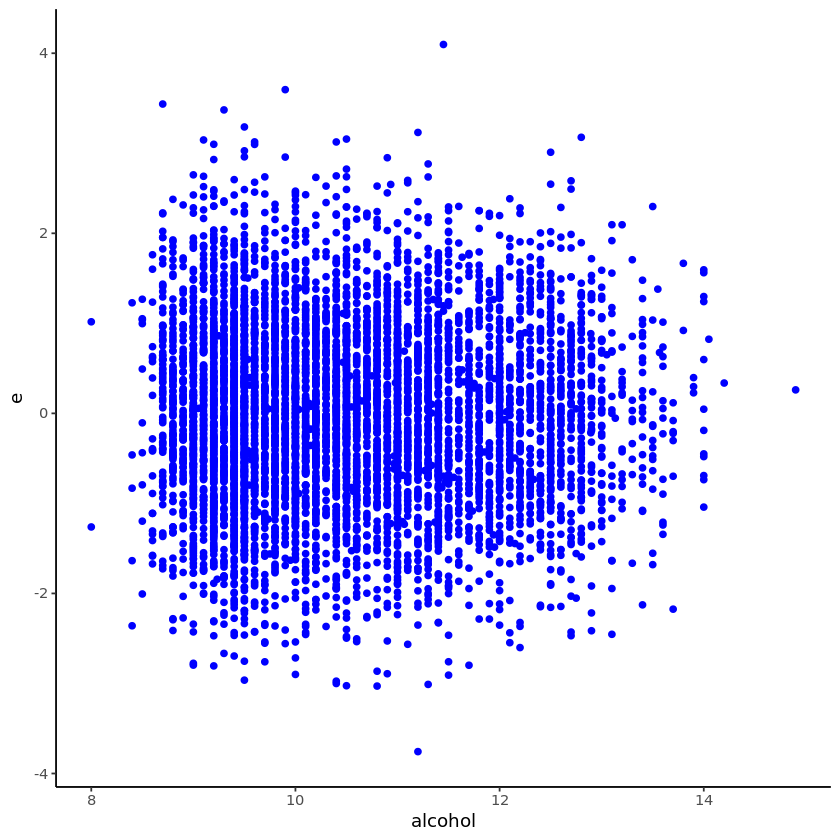

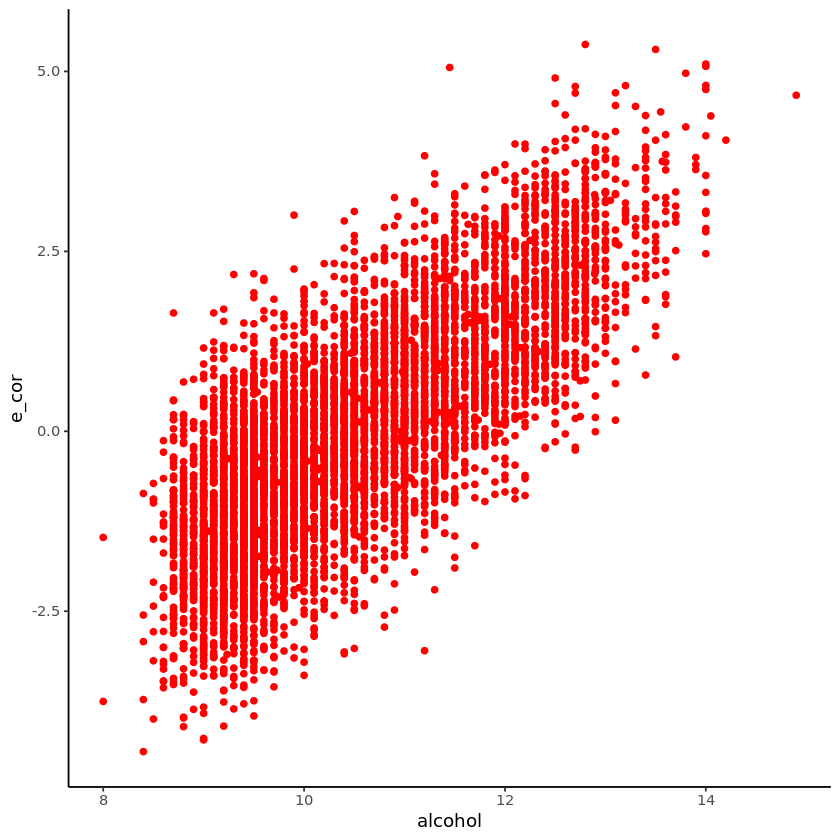

In [11]:
# Inspektion der Korrelation
ggplot(winequality) + geom_point(aes(x=alcohol, y=e), col="blue")+theme_classic()
ggplot(winequality) + geom_point(aes(x=alcohol, y=e_cor), col="red")+theme_classic()

In [12]:
# Schätzen der Regression
lm_cor = lm(data=winequality, 
               formula="quality_cor ~ alcohol")

summary(lm_cor)


Call:
lm(formula = "quality_cor ~ alcohol", data = winequality)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0369 -0.8543 -0.0012  0.8296  4.9836 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8.10876    0.13795  -58.78   <2e-16 ***
alcohol      1.32579    0.01306  101.48   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.256 on 6495 degrees of freedom
Multiple R-squared:  0.6132,	Adjusted R-squared:  0.6132 
F-statistic: 1.03e+04 on 1 and 6495 DF,  p-value: < 2.2e-16


In [13]:
# Vergleich des alcohol Schätzwert
b_alcohol_basic=lm_basic$coefficients[names(lm_basic$coefficients)=="alcohol"]
b_alcohol_basic

b_alcohol_cor=lm_cor$coefficients[names(lm_cor$coefficients)=="alcohol"]
b_alcohol_cor

alcohol 
0.325312

alcohol 
1.325786

### Simulation der Auswirkungen von einem zufälligen Messfehler

In [14]:
set.seed(127127)
b_alcohol_vector=c()

In [15]:
for(i in 1:100){
  # zufälliger Messfehler
  e=rnorm(nrow(winequality),0,1)
  winequality$quality_sim=winequality$quality+e
  
  # Regression
  lm_loop = lm(data=winequality, 
              formula="quality_sim ~ alcohol")
  
  # Schätzwert
  b_alcohol_vector[i]=lm_loop$coefficients[names(lm_loop$coefficients)=="alcohol"]
}

[1] 0.3257862 0.3358329 0.3170320 0.3097485 0.3368812 0.3568971

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


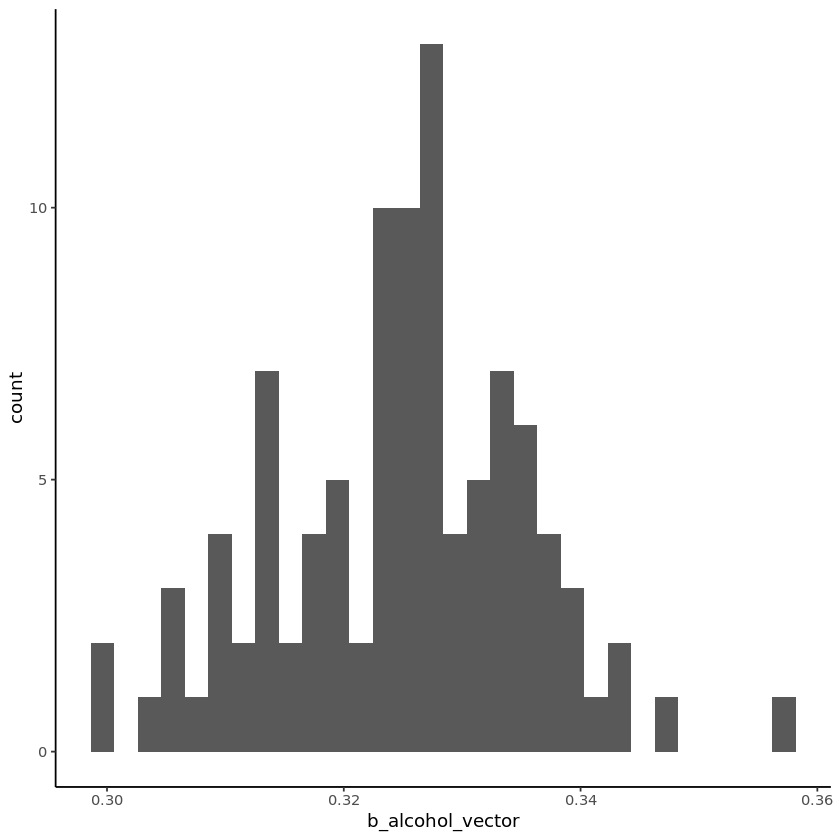

In [16]:
# Alle Schätzwerte
head(b_alcohol_vector)
ggplot()+ geom_histogram(aes(b_alcohol_vector))+ theme_classic()

In [17]:
# Theoretischer Mittelwert
b_1 = lm_basic$coefficients[names(lm_basic$coefficients)=="alcohol"]
cov_x_e = 0
var_x1 = var(winequality$alcohol)

b_1+cov_x_e/var_x1

# Praktischer Mittelwert
mean(b_alcohol_vector)

alcohol 
0.325312

[1] 0.3250168

In [18]:
# Theoretische Varianz
var_u = var(lm_basic$residuals)
var_e = 1
var_x1 = var(winequality$alcohol)
             
(var_u + var_e) / (nrow(winequality) * var_x1)

# Praktische Varianz
var(b_alcohol_vector)

[1] 0.000174417

[1] 0.0001131513

In [19]:
# Vergleich der Standardabweichung zum Basic Modell
summary(lm_basic)
sd(b_alcohol_vector)


Call:
lm(formula = "quality ~ alcohol", data = winequality)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5042 -0.4957 -0.0488  0.5043  3.2115 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.405269   0.085941   27.99   <2e-16 ***
alcohol     0.325312   0.008139   39.97   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7824 on 6495 degrees of freedom
Multiple R-squared:  0.1974,	Adjusted R-squared:  0.1973 
F-statistic:  1598 on 1 and 6495 DF,  p-value: < 2.2e-16


[1] 0.01063726

## Messfehler in der abhängigen Variable

Fügen sie einen zufälligen standard-normalverteilten Messfehler zu der Variable *alcohol* hinzu.

In [20]:
# Ihr Code

Vergleichen Sie den theoretischen Mittelwert und die Varianz des geschätzten Parameters mit den Werten der Simulation (Analog zur vorherigen Übung ‚Messfehler in der abhängigen Variable‘)

In [21]:
# Ihr Code

## Instrumentalvariable

The gapminder dataset provides country-level data on GDP per capita, life expectancy, and population, making it ideal for analyzing global development trends.

We examine the effect of **life expectancy on GDP per capita**, a key idea in **unified growth theory**, which suggests improved health boosts human and physical capital investment, driving economic growth.

However, endogeneity arises as life expectancy depends on factors like income and healthcare, which also influence GDP. Reverse causality complicates this further, as higher GDP improves health and longevity.

Addressing these issues is essential for uncovering the true causal relationship and guiding policy.

In [22]:
library(gapminder)
library(estimatr)

options(scipen = 999)
data(gapminder)

# View the first few rows of the dataset
head(gapminder)

# Summary of the dataset
summary(gapminder)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


        country        continent        year         lifeExp     
 Afghanistan:  12   Africa  :624   Min.   :1952   Min.   :23.60  
 Albania    :  12   Americas:300   1st Qu.:1966   1st Qu.:48.20  
 Algeria    :  12   Asia    :396   Median :1980   Median :60.71  
 Angola     :  12   Europe  :360   Mean   :1980   Mean   :59.47  
 Argentina  :  12   Oceania : 24   3rd Qu.:1993   3rd Qu.:70.85  
 Australia  :  12                  Max.   :2007   Max.   :82.60  
 (Other)    :1632                                                
      pop               gdpPercap       
 Min.   :     60011   Min.   :   241.2  
 1st Qu.:   2793664   1st Qu.:  1202.1  
 Median :   7023596   Median :  3531.8  
 Mean   :  29601212   Mean   :  7215.3  
 3rd Qu.:  19585222   3rd Qu.:  9325.5  
 Max.   :1318683096   Max.   :113523.1  
                                        

**OLS regression**

In [23]:
ols <- lm(gdpPercap ~ lifeExp, data = gapminder)
summary(ols)


Call:
lm(formula = gdpPercap ~ lifeExp, data = gapminder)

Residuals:
   Min     1Q Median     3Q    Max 
-11483  -4539  -1223   2482 106950 

Coefficients:
             Estimate Std. Error t value            Pr(>|t|)    
(Intercept) -19277.25     914.09  -21.09 <0.0000000000000002 ***
lifeExp        445.44      15.02   29.66 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8006 on 1702 degrees of freedom
Multiple R-squared:  0.3407,	Adjusted R-squared:  0.3403 
F-statistic: 879.6 on 1 and 1702 DF,  p-value: < 0.00000000000000022


**First Stage Regression**

We want to use **population** as instrument for **life expectancy**. To assess the accuracy of the instrument, we need two conditions:

- **Power of the Instrument:** Population must significantly predict life expectancy. This can be tested in the first stage of the IV regression by checking the F-statistic. An F-statistic > 10 indicates a strong instrument.

- **Exclusion Restriction:** Population must affect GDP per capita only through its impact on life expectancy. This cannot be directly tested but must be justified economic arguments.

Without both conditions satisfied, population may not be a valid instrument.


In [24]:
first_stage <- lm(lifeExp ~ pop, data = gapminder)
summary(first_stage)
fit_lifeExp <- predict(first_stage)


Call:
lm(formula = lifeExp ~ pop, data = gapminder)

Residuals:
   Min     1Q Median     3Q    Max 
-35.70 -11.13   1.07  11.45  22.91 

Coefficients:
                   Estimate      Std. Error t value             Pr(>|t|)    
(Intercept) 59.240481571485  0.324271376479 182.688 < 0.0000000000000002 ***
pop          0.000000007904  0.000000002943   2.685              0.00731 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.89 on 1702 degrees of freedom
Multiple R-squared:  0.004219,	Adjusted R-squared:  0.003634 
F-statistic: 7.212 on 1 and 1702 DF,  p-value: 0.007314


**Second Stage**

In [25]:
second_stage <- lm(gdpPercap ~ fit_lifeExp, data = gapminder)
summary(second_stage)


Call:
lm(formula = gdpPercap ~ fit_lifeExp, data = gapminder)

Residuals:
   Min     1Q Median     3Q    Max 
 -6985  -6004  -3651   2106 106238 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  25102.7    16933.1   1.482    0.138
fit_lifeExp   -300.8      284.7  -1.056    0.291

Residual standard error: 9857 on 1702 degrees of freedom
Multiple R-squared:  0.0006553,	Adjusted R-squared:  6.818e-05 
F-statistic: 1.116 on 1 and 1702 DF,  p-value: 0.2909


Estimating correct stadnard errors.

In [26]:
iv_model <- iv_robust(gdpPercap ~ lifeExp | pop, data = gapminder)
summary(iv_model)


Call:
iv_robust(formula = gdpPercap ~ lifeExp | pop, data = gapminder)

Standard error type:  HC2 

Coefficients:
            Estimate Std. Error t value Pr(>|t|) CI Lower CI Upper   DF
(Intercept)  25102.7    13389.7   1.875  0.06099  -1159.3  51364.7 1702
lifeExp       -300.8      224.7  -1.339  0.18086   -741.4    139.9 1702

Multiple R-squared:  -0.6154 ,	Adjusted R-squared:  -0.6164 
F-statistic: 1.792 on 1 and 1702 DF,  p-value: 0.1809